From the Kaggle description:
The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# Import Pandas for now:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp, chi2_contingency

In [2]:
# Import data pre-processing packages:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import supervised ML classification classes:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import performance-measuring methods:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [3]:
# Read in the data:

census_data = pd.read_csv('adult.csv')

In [4]:
# Begin the process of making sense of the data:

print(census_data.info())
print('')
print(census_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

   age workclass  fnlwgt education  education.num marital.status  \
0   90         ?   

So far, the following seem to be associated with income: hours.per.week, sex, education

Looking at the income column:

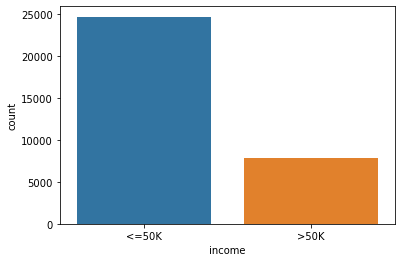

In [6]:
sns.countplot(data = census_data, x = 'income')

(-1.1044035849585763,
 1.100209694521837,
 -1.1045212041173795,
 1.1052026136793909)

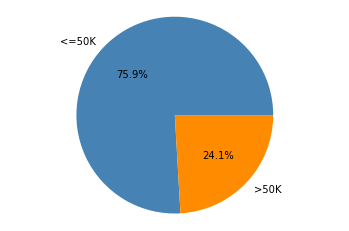

In [11]:
plt.pie(census_data.income.value_counts()/len(census_data),autopct = '%1.1f%%', labels = ['<=50K','>50K'], \
        colors = ['steelblue','darkorange'])
plt.axis('equal')

Looking at the association between hours worked per week and income:

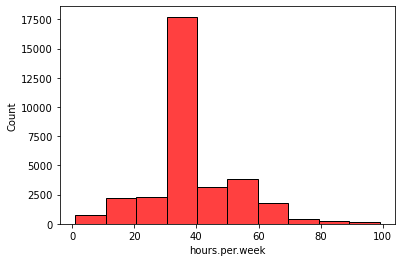

In [8]:
sns.histplot(data=census_data, x = 'hours.per.week', stat = 'count', color = 'red', \
             common_norm = False, bins = 10, kde = False, legend = True)

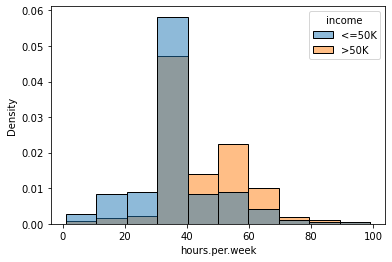

In [9]:
sns.histplot(data=census_data, x = 'hours.per.week', hue = 'income', stat = 'density', \
             common_norm = False, bins = 10, kde = False, legend = True)

This is for doing stats with Excel, but it does have a nice, clear summary of what the null hypothesis of a 2-sample K-S test is:
https://www.real-statistics.com/non-parametric-tests/goodness-of-fit-tests/two-sample-kolmogorov-smirnov-test/

In [10]:
low_income = census_data[census_data.income == '<=50K']
high_income = census_data[census_data.income == '>50K']
ksstat_hrsinc, kspval_hrsinc = ks_2samp(low_income['hours.per.week'], high_income['hours.per.week'])
print('K-S test p-value for income levels hours worked per week test: '+ str(kspval_hrsinc))

K-S test p-value for income levels hours worked per week test: 0.0


looking at the sex breakdown of the data set ...

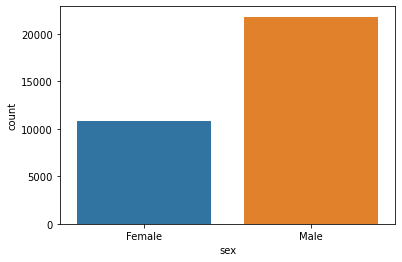

In [11]:
sns.countplot(data = census_data, x = 'sex')

(-1.1021382393498231,
 1.1001018209214202,
 -1.102164574188759,
 1.1011885335747025)

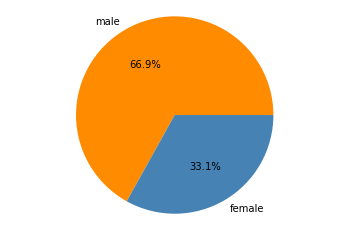

In [12]:
plt.pie(census_data.sex.value_counts()/len(census_data),autopct = '%1.1f%%', labels = ['male','female'], \
        colors = ['darkorange','steelblue'])
plt.axis('equal')

looking at the association between sex and income:

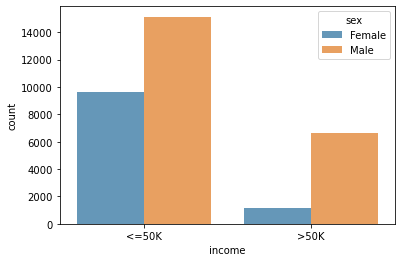

In [13]:
sns.countplot(data = census_data, x = 'income', hue = 'sex', alpha = 0.75)

[0.8, 2.8]
<=50K    15128
>50K      6662
Name: income, dtype: int64
[1.6, 3.6]


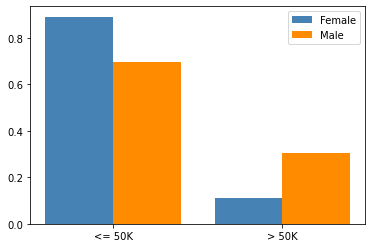

In [14]:
m_census_data = census_data[census_data.sex == 'Male']
f_census_data = census_data[census_data.sex == 'Female']

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

print(xvalues1)
print(m_census_data.income.value_counts())
print(xvalues2)

ax = plt.subplot()
plt.bar(xvalues1, f_census_data.income.value_counts()/len(f_census_data), color = 'steelblue')
plt.bar(xvalues2, m_census_data.income.value_counts()/len(m_census_data), color = 'darkorange')
ax.set_xticks(centers)
ax.set_xticklabels(["<= 50K", "> 50K"])
plt.legend(['Female','Male'])
plt.show()

In [15]:
sex_income_crosstab = pd.crosstab(census_data.sex, census_data.income)

chi2_si, pvalue_si, dof_si, expect_si = chi2_contingency(sex_income_crosstab)
print('Chi-square p-value for sex/income association: '+ str(pvalue_si))

Chi-square p-value for sex/income association: 0.0


Looking at a possible association between education and income ...

In [16]:
print(census_data.education.value_counts())
print('')
print(census_data['education.num'].value_counts())
print(census_data.education.nunique(), census_data['education.num'].nunique())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64
16 16


correspondence is as follows:
1 -- Preschool
2 -- 1st - 4th
3 -- 5th - 6th
4 -- 7th - 8th
5 -- 9th
6 -- 10th
7 -- 11th
8 -- 12th
9 -- HS-grad
10 -- Some-college
11 -- Assoc-voc
12 -- Assoc-acdm
13 -- Bachelors
14 -- Masters
15 -- Prof-school
16 -- Doctorate

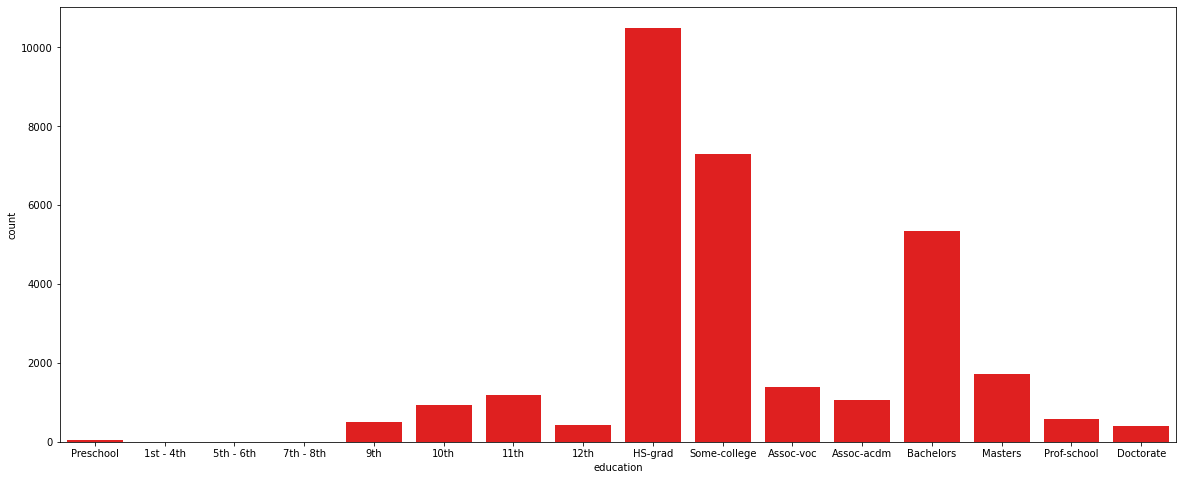

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'education', order = ['Preschool', '1st - 4th', '5th - 6th', '7th - 8th', \
                                                          '9th', '10th', '11th', '12th', 'HS-grad', \
                                                          'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', \
                                                          'Masters', 'Prof-school', 'Doctorate'], \
             color = 'red')

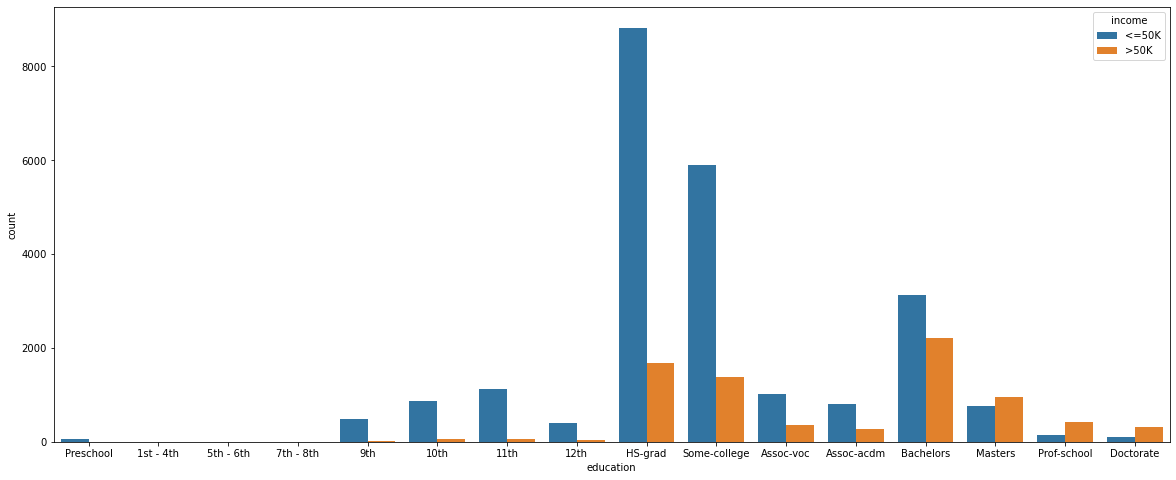

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'education', hue = 'income',
              order = ['Preschool', '1st - 4th', '5th - 6th', '7th - 8th', '9th', '10th', '11th', '12th', 'HS-grad',\
                       'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'])

In [19]:
edu_income_crosstab = pd.crosstab(census_data.education, census_data.income)

chi2_edi, pvalue_edi, dof_edi, expect_edi = chi2_contingency(edu_income_crosstab)
print('Chi-square p-value for education/income association: '+ str(pvalue_edi))

Chi-square p-value for education/income association: 0.0


Looking at association between capital gain and income ...

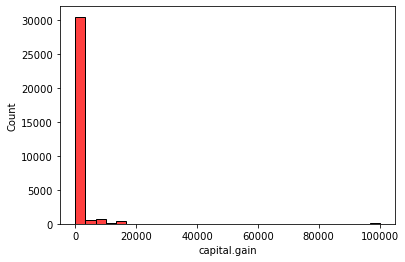

In [20]:
sns.histplot(data=census_data, x = 'capital.gain', stat = 'count', color = 'red', \
             common_norm = False, bins = 30, kde = False, legend = True)

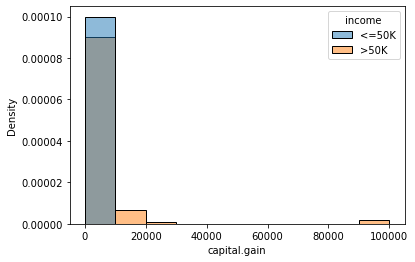

In [21]:
sns.histplot(data=census_data, x = 'capital.gain', hue = 'income', stat = 'density', \
             common_norm = False, bins = 10, kde = False, legend = True)

Looking at association between capital loss and income ...

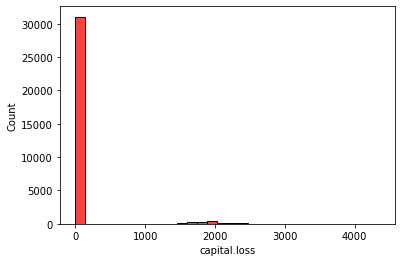

In [22]:
sns.histplot(data=census_data, x = 'capital.loss', stat = 'count', color = 'red', \
             common_norm = False, bins = 30, kde = False, legend = True)

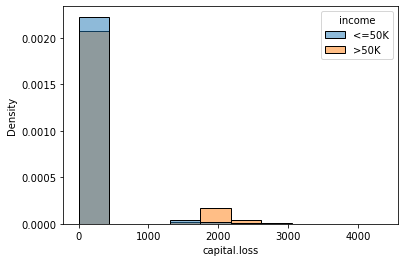

In [23]:
sns.histplot(data=census_data, x = 'capital.loss', hue = 'income', stat = 'density', \
             common_norm = False, bins = 10, kde = False, legend = True)

Looking at associationb between age and income ...

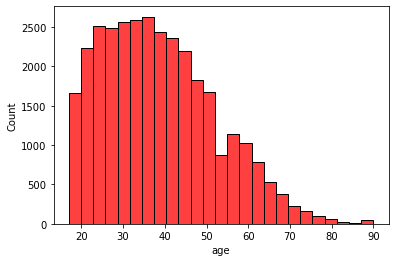

In [24]:
sns.histplot(data=census_data, x = 'age', stat = 'count', color = 'red', \
             common_norm = False, bins = 25, kde = False, legend = True)

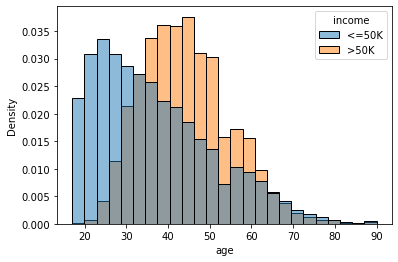

In [25]:
sns.histplot(data=census_data, x = 'age', hue = 'income', stat = 'density', \
             common_norm = False, bins = 25, kde = False, legend = True)

In [26]:
ksstat_ageinc, kspval_ageinc = ks_2samp(low_income['age'], high_income['age'])
print('K-S test p-value for income levels age test: '+ str(kspval_ageinc))

K-S test p-value for income levels age test: 0.0


Looking at association b/n income and "fnlwgt:" <br>
N.B.: According to https://www.kaggle.com/uciml/adult-census-income/discussion/32698, "The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents." <br>
Also, this seems like it will prove handy:
http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf <br>

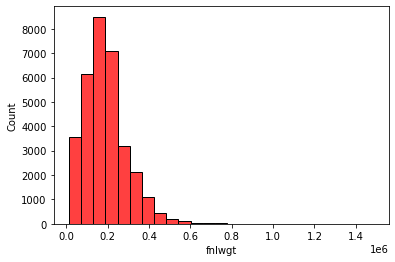

In [27]:
sns.histplot(data=census_data, x = 'fnlwgt', stat = 'count', color = 'red', \
             common_norm = False, bins = 25, kde = False, legend = True)

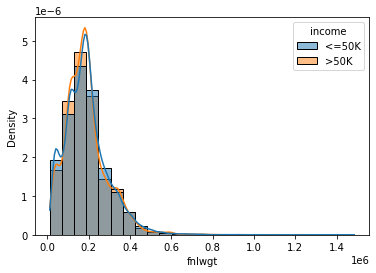

In [30]:
sns.histplot(data=census_data, x = 'fnlwgt', hue = 'income', stat = 'density', \
             common_norm = False, bins = 25, kde = True, legend = True)

In [29]:
ksstat_wgtinc, kspval_wgtinc = ks_2samp(low_income['fnlwgt'], high_income['fnlwgt'])
print('K-S test p-value for income levels final weight test: '+ str(kspval_wgtinc))

K-S test p-value for income levels final weight test: 6.902297125966985e-05


Looking at the relationship column:

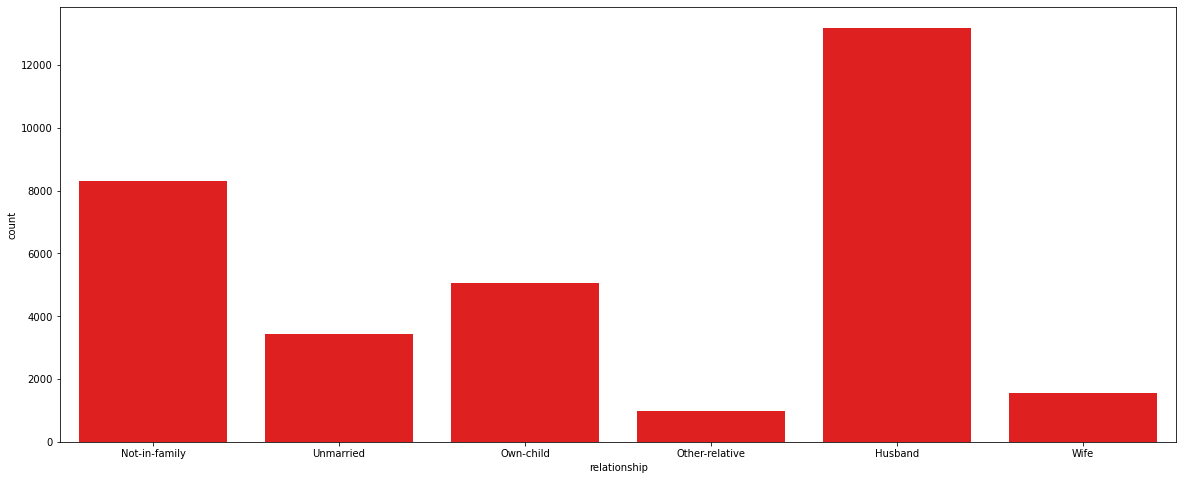

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'relationship', color = 'red')

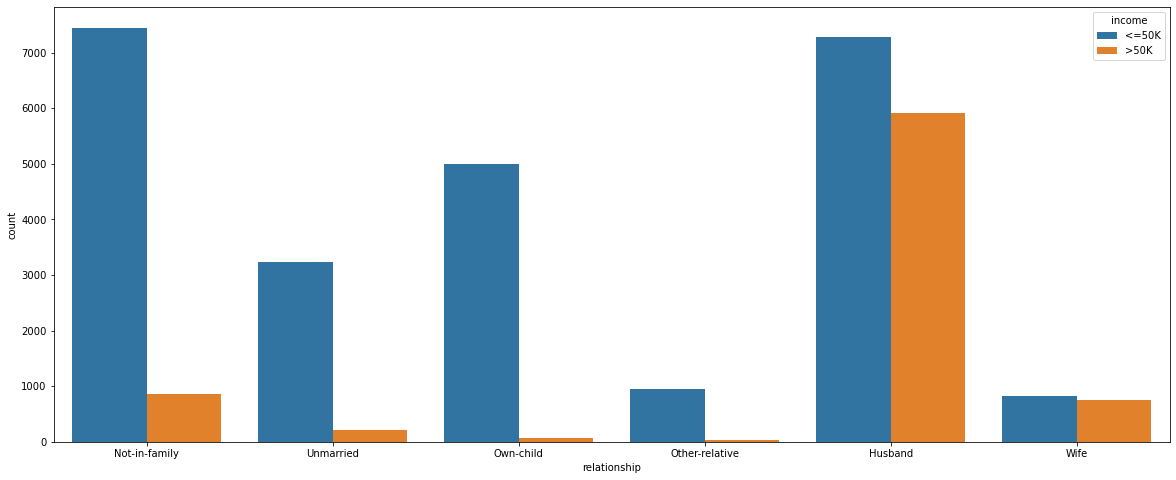

In [32]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'relationship', hue = 'income')

Looking at the marital status column:

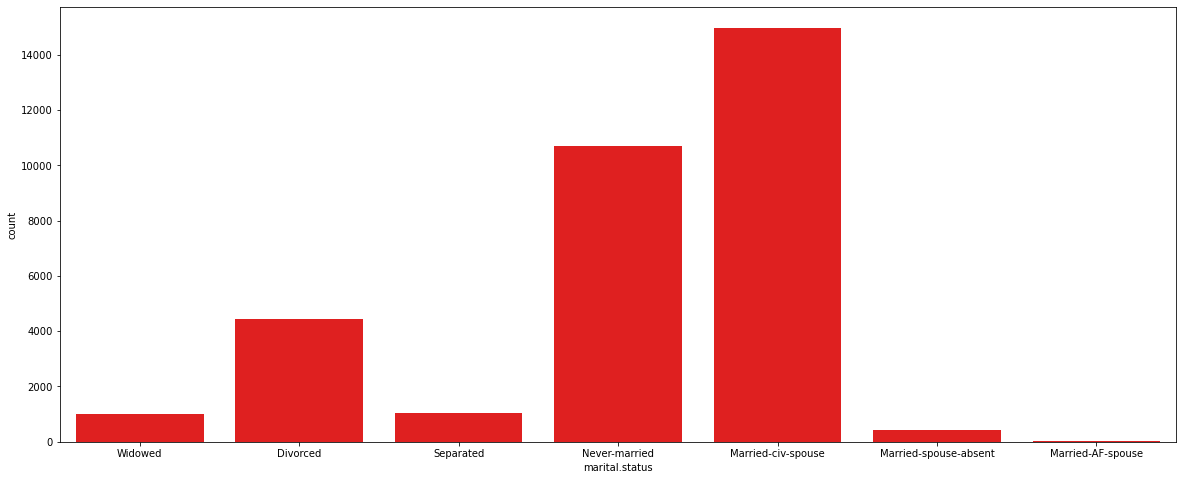

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'marital.status', color = 'red')

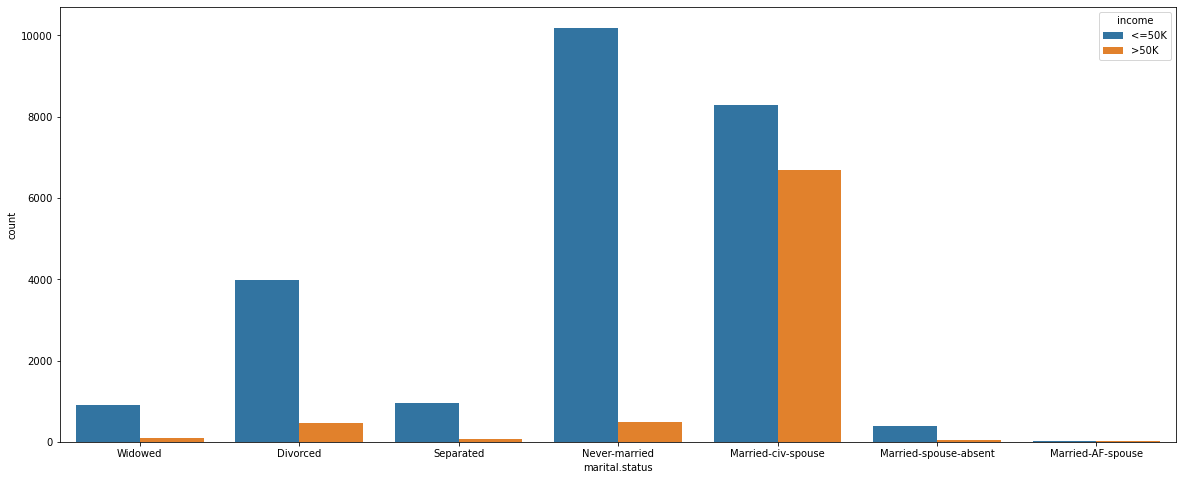

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'marital.status', hue = 'income')

Looking at the "workclass" column:

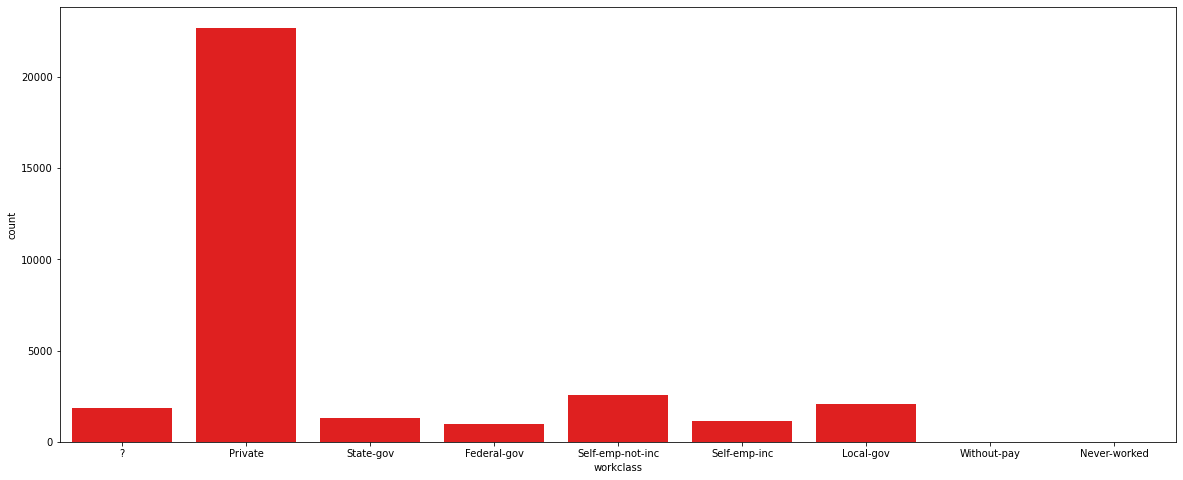

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'workclass', color = 'red')

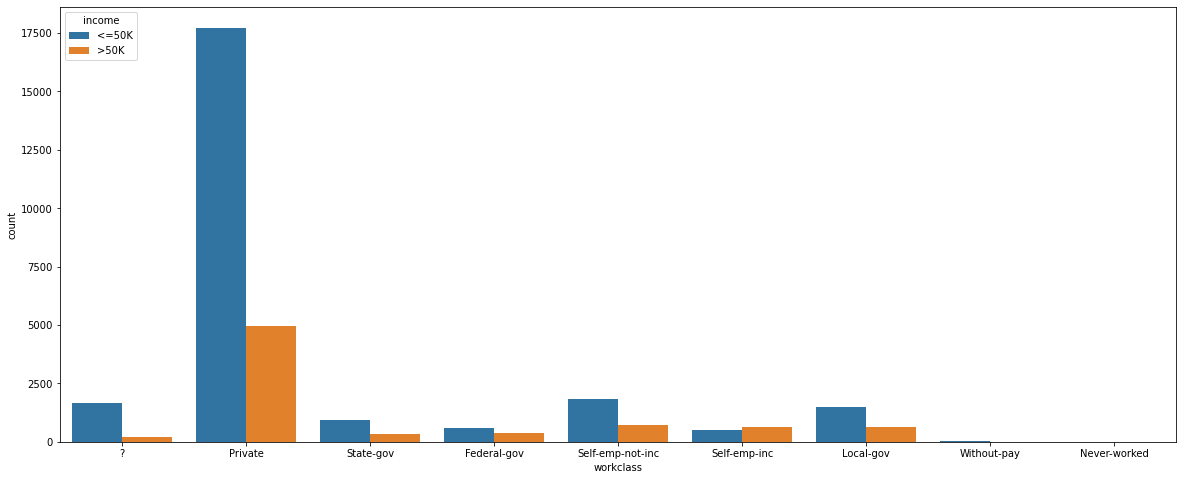

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'workclass', hue = 'income')

Looking at the "occupation" column:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

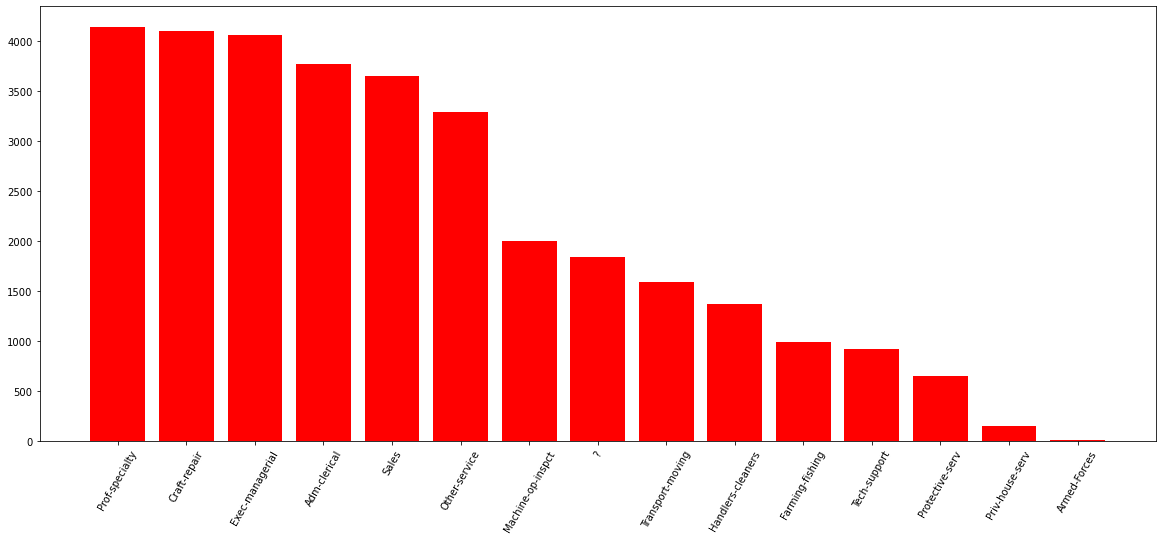

In [42]:
occupations = ['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service',\
               'Machine-op-inspct','?','Transport-moving','Handlers-cleaners','Farming-fishing',\
               'Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
plt.figure(figsize=(20,8))
plt.bar(occupations, census_data.occupation.value_counts(), color = 'red')
plt.xticks(rotation = 60)

Looking at the "native.country" column:

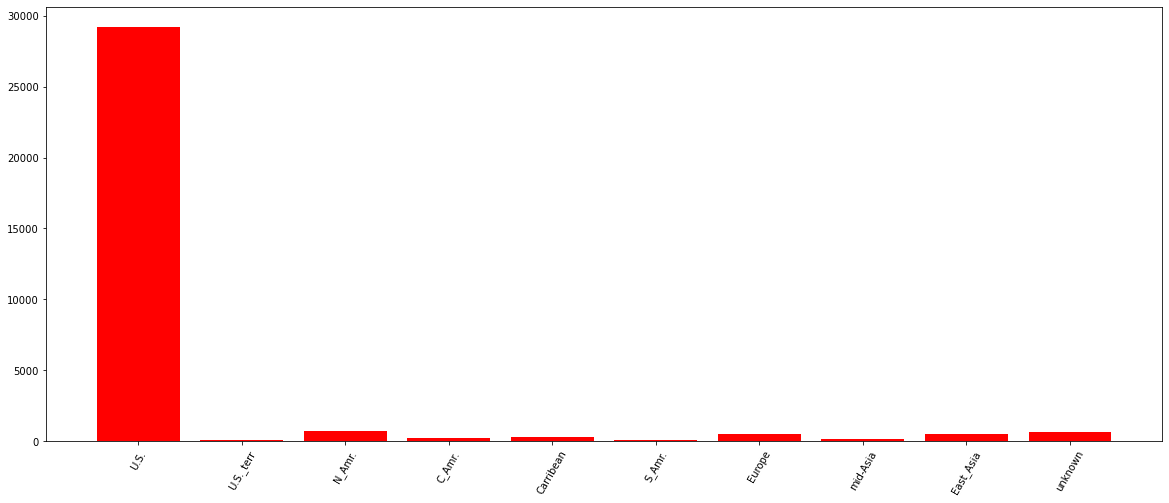

(-1.1039961696306793,
 1.100190293791937,
 -1.1076020377750515,
 1.1068027538393688)

<Figure size 432x288 with 0 Axes>

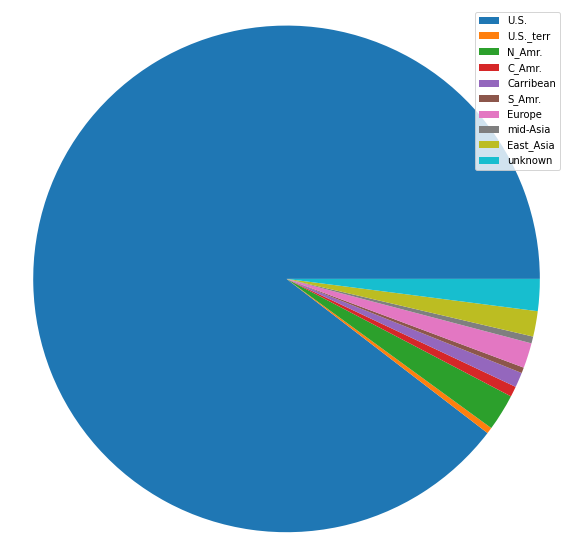

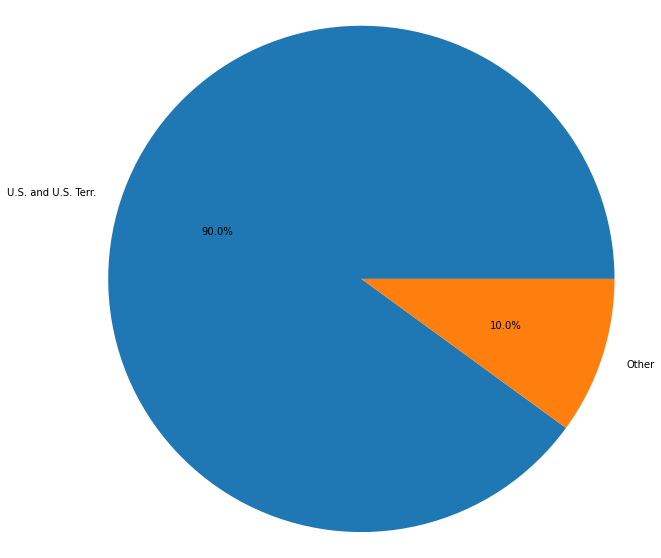

In [66]:
#print(census_data['native.country'].value_counts())
native_country_regions = ['U.S.', 'U.S. Terr','N. Amr.','C. Amr.','Carribean', 'S. Amr.', 'Europe', 'mid-Asia', \
                          'East_Asia','unknown']
native_country_counts = [29170, 114+14, 121+643, 64+13+34+106, 95+70+81+44+19, 59+28+31, \
                         137+90+73+60+37+29+29+24+16+13+12+1, 100+43, 198+75+67+62+51+20+19+18+18, 583+80]

plt.figure(figsize=(20,8))
plt.bar(native_country_regions, native_country_counts, color = 'red')
plt.xticks(rotation = 60)
plt.show()
plt.clf()

native_country_counts = np.array(native_country_counts)

plt.figure(figsize=(10,10))
plt.pie(native_country_counts/sum(native_country_counts))
plt.legend(native_country_regions, loc = 0)
plt.axis('equal')

native_country_bimodal_regions = ['U.S. and U.S. Terr.', 'Other']
native_country_bimodal_counts = [29170+114+14,\
                                 121+643+64+13+34+106+95+70+81+44+19+59+28+31+137+90+73+60+37+29+29+24+16+13+12+1+\
                                 100+43+198+75+67+62+51+20+19+18+18+583+80]
native_country_bimodal_counts = np.array(native_country_bimodal_counts)

plt.figure(figsize=(10,10))
plt.pie(native_country_bimodal_counts/sum(native_country_bimodal_counts), labels = native_country_bimodal_regions, \
        autopct = '%0.1f%%')
plt.axis('equal')

There's an association between income and race, but I can't include that in a quantitative model.

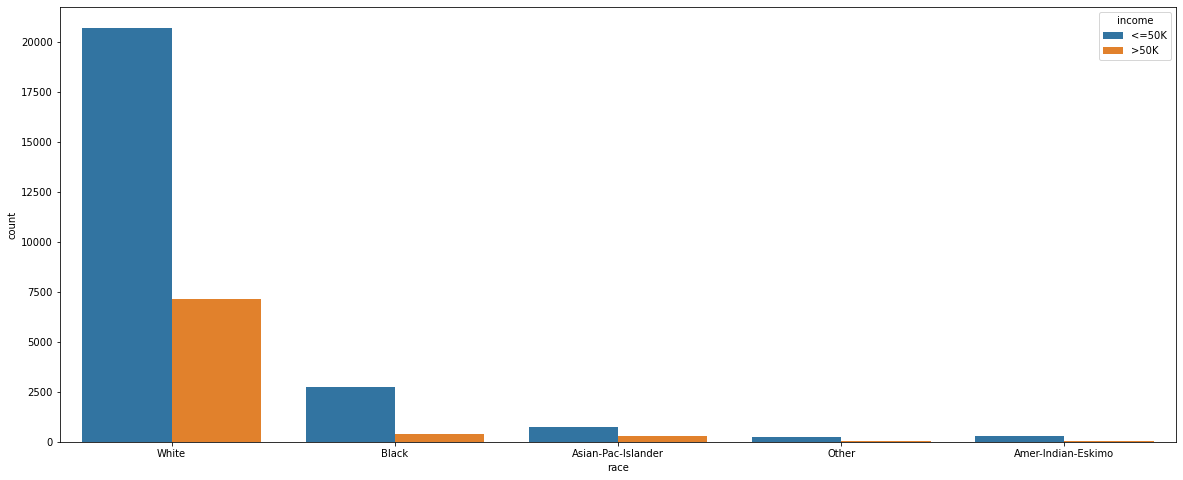

In [60]:
plt.figure(figsize=(20,8))
sns.countplot(data=census_data, x = 'race', hue = 'income')

In [61]:
race_income_crosstab = pd.crosstab(census_data.race, census_data.income)

chi2_ri, pvalue_ri, dof_ri, expect_ri = chi2_contingency(race_income_crosstab)
print('Chi-square p-value for education/income association: '+ str(pvalue_ri))

Chi-square p-value for education/income association: 2.305960610160958e-70


Building ML models to predict if income < 50K

In [5]:
# map <50K to 1; map <= 50K to 0:

census_data["income_binary"] = census_data.income.map({"<=50K": 0, ">50K": 1})
census_data["sex_binary"] = census_data.sex.map({"Male": 0, "Female": 1})

print(census_data.head(3))

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country income  income_binary  sex_binary  
0              40  United-States  <=50K              0           1  
1              18  United-States  <=50K              0           1  
2              40  United-States  <=50K              0           1  


columns to use in prediction: hours.per.week, education.num, sex_binary, age <br>
consider adding capital.loss and capital.gain

In [6]:
pred_inc_data = census_data[['age','education.num','sex_binary','hours.per.week']]
pred_inc_target = census_data['income_binary']

In [7]:
data_train, data_valid, target_train, target_valid = train_test_split(pred_inc_data, pred_inc_target, \
                                                                      train_size = 0.8, test_size = 0.2, random_state = 75)

mmscaler = MinMaxScaler()
scaled_data_train = mmscaler.fit_transform(data_train)
scaled_data_valid = mmscaler.transform(data_valid)

In [8]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(scaled_data_train, target_train)
lr_predictions = logistic_regressor.predict(scaled_data_valid)

print(accuracy_score(target_valid,lr_predictions))
print(recall_score(target_valid,lr_predictions))
print(precision_score(target_valid,lr_predictions))
print(confusion_matrix(target_valid,lr_predictions))

0.8062336864732075
0.3813451776649746
0.6768018018018018
[[4650  287]
 [ 975  601]]


In [9]:
scores = []
gees = []
cees = []

for g in range(1,5):
    for c in range(1,10):
        c = c / 10.0
        classes = SVC(kernel = 'rbf', gamma = g, C = c)
        classes.fit(scaled_data_train, target_train)
        scores.append(classes.score(scaled_data_valid,target_valid))
        gees.append(g)
        cees.append(c)

print(scores.index(max(scores)), max(scores))
print(gees[27]) 
print(cees[27]) 

svm_classifier = SVC(kernel = 'rbf', gamma = 4, C = 0.1)
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

27 0.8076155381544603
4
0.1
0.8076155381544603
0.35406091370558374
0.7036569987389659
[[4702  235]
 [1018  558]]


In [10]:
# instantiate an object of the SVC class:
svm_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

0.7181022570244127
0.8064720812182741
0.453604568165596
[[3406 1531]
 [ 305 1271]]


In [11]:
# an empty array to hold accuracy scores:
scores_all = []

# Loop over a range of ks and store the resulting model accuracy score:
for k in range(1,300):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_data_train, target_train)
    scores_all.append(classifier.score(scaled_data_valid, target_valid))

# print out the k which resulted in the model with the highest accuracy score:
print(scores_all.index(max(scores_all))+1)

80


Text(0.5, 0, 'k')

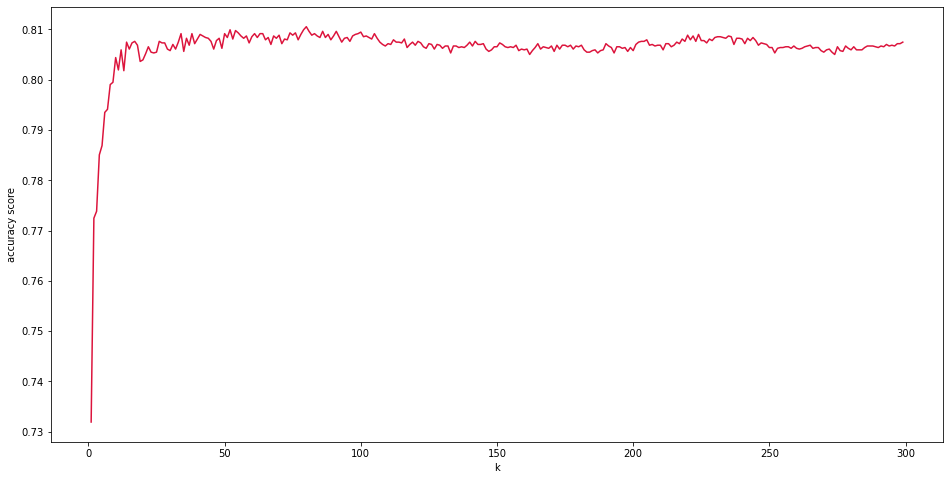

In [12]:
plt.figure(figsize=(16,8))
plt.plot(range(1,300),scores_all, color = 'crimson')
plt.ylabel('accuracy score')
plt.xlabel('k')
#plt.title('Accuracy Score of KNN model')

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors = scores_all.index(max(scores_all))+1)
knn_classifier.fit(scaled_data_train, target_train)
knn_predictions = knn_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,knn_predictions))

print(recall_score(target_valid,knn_predictions))
print(precision_score(target_valid,knn_predictions))
print(confusion_matrix(target_valid,knn_predictions))

0.8105327805926609
0.41053299492385786
0.6796218487394958
[[4632  305]
 [ 929  647]]


In [14]:
classatree = DecisionTreeClassifier(random_state = 74)
classatree.fit(scaled_data_train, target_train)
classatree_predictions = classatree.predict(scaled_data_valid)

print(accuracy_score(target_valid,classatree_predictions))
print(recall_score(target_valid,classatree_predictions))
print(precision_score(target_valid,classatree_predictions))
print(confusion_matrix(target_valid,classatree_predictions))

0.7767541839398127
0.3953045685279188
0.5542704626334519
[[4436  501]
 [ 953  623]]


In [15]:
forest = RandomForestClassifier(n_estimators = 5000, random_state = 74)
forest.fit(scaled_data_train, target_train)
forest_predictions = forest.predict(scaled_data_valid)

print(accuracy_score(target_valid,forest_predictions))
print(recall_score(target_valid,forest_predictions))
print(precision_score(target_valid,forest_predictions))
print(confusion_matrix(target_valid,forest_predictions))

0.7861200675571933
0.42956852791878175
0.578138343296328
[[4443  494]
 [ 899  677]]


In [ ]:
######################################################################################################

In [16]:
data_train, data_valid, target_train, target_valid = train_test_split(pred_inc_data, pred_inc_target, \
                                                                     train_size = 0.85, test_size = 0.15, random_state = 75)
mmscaler = MinMaxScaler()
scaled_data_train = mmscaler.fit_transform(data_train)
scaled_data_valid = mmscaler.transform(data_valid)

In [17]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(scaled_data_train, target_train)
lr_predictions = logistic_regressor.predict(scaled_data_valid)

print(accuracy_score(target_valid,lr_predictions))
print(recall_score(target_valid,lr_predictions))
print(precision_score(target_valid,lr_predictions))
print(confusion_matrix(target_valid,lr_predictions))

0.8073694984646879
0.3742437337942956
0.6661538461538462
[[3511  217]
 [ 724  433]]


In [18]:
# instantiate an object of the SVC class:
svm_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

0.7160696008188332
0.8046672428694901
0.4450286806883365
[[2567 1161]
 [ 226  931]]


In [19]:
classatree = DecisionTreeClassifier(random_state = 74)
classatree.fit(scaled_data_train, target_train)
classatree_predictions = classatree.predict(scaled_data_valid)

print(accuracy_score(target_valid,classatree_predictions))
print(recall_score(target_valid,classatree_predictions))
print(precision_score(target_valid,classatree_predictions))
print(confusion_matrix(target_valid,classatree_predictions))

0.786489252814739
0.39671564390665515
0.5708955223880597
[[3383  345]
 [ 698  459]]


In [20]:
forest = RandomForestClassifier(n_estimators = 5000, random_state = 74)
forest.fit(scaled_data_train, target_train)
forest_predictions = forest.predict(scaled_data_valid)

print(accuracy_score(target_valid,forest_predictions))
print(recall_score(target_valid,forest_predictions))
print(precision_score(target_valid,forest_predictions))
print(confusion_matrix(target_valid,forest_predictions))

0.7952917093142272
0.4278305963699222
0.5942376950780313
[[3390  338]
 [ 662  495]]


In [ ]:
##################################################################################################

In [6]:
pred_inc_data = census_data[['age','education.num','sex_binary','hours.per.week','capital.gain','capital.loss']]
pred_inc_target = census_data['income_binary']

In [7]:
data_train, data_valid, target_train, target_valid = train_test_split(pred_inc_data, pred_inc_target, \
                                                                      train_size = 0.8, test_size = 0.2, random_state = 75)

mmscaler = MinMaxScaler()
scaled_data_train = mmscaler.fit_transform(data_train)
scaled_data_valid = mmscaler.transform(data_valid)

In [24]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(scaled_data_train, target_train)
lr_predictions = logistic_regressor.predict(scaled_data_valid)

print(accuracy_score(target_valid,lr_predictions))
print(recall_score(target_valid,lr_predictions))
print(precision_score(target_valid,lr_predictions))
print(confusion_matrix(target_valid,lr_predictions))

0.8162137263933671
0.40545685279187815
0.710789766407119
[[4677  260]
 [ 937  639]]


In [25]:
# instantiate an object of the SVC class:
svm_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

0.758329494856441
0.7906091370558376
0.5004016064257029
[[3693 1244]
 [ 330 1246]]


In [26]:
# an empty array to hold accuracy scores:
scores_all = []

# Loop over a range of ks and store the resulting model accuracy score:
for k in range(1,301):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_data_train, target_train)
    scores_all.append(classifier.score(scaled_data_valid, target_valid))

# print out the k which resulted in the model with the highest accuracy score:
print(scores_all.index(max(scores_all))+1)

21


Text(0.5, 0, 'k')

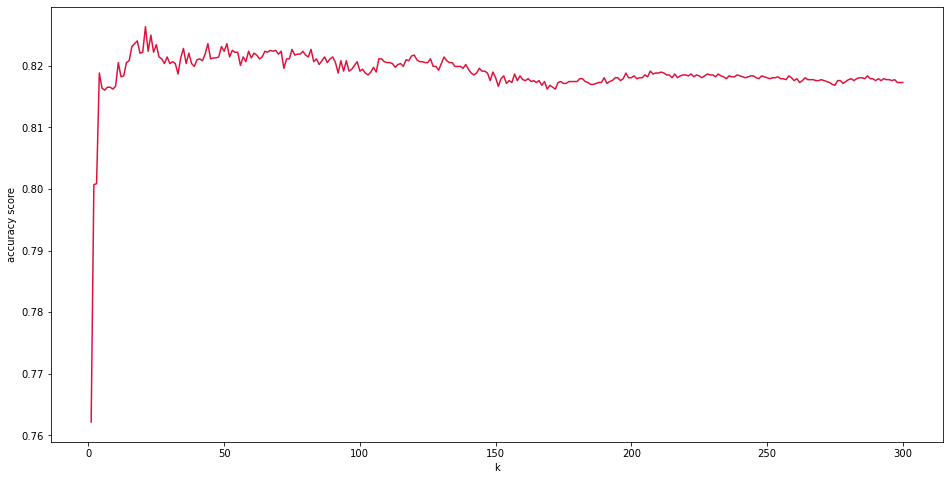

In [27]:
plt.figure(figsize=(16,8))
plt.plot(range(1,301),scores_all, color = 'crimson')
plt.ylabel('accuracy score')
plt.xlabel('k')
#plt.title('Accuracy Score of KNN model')

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors = scores_all.index(max(scores_all))+1)
knn_classifier.fit(scaled_data_train, target_train)
knn_predictions = knn_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,knn_predictions))
print(recall_score(target_valid,knn_predictions))
print(precision_score(target_valid,knn_predictions))
print(confusion_matrix(target_valid,knn_predictions))

0.8263473053892215
0.4631979695431472
0.7192118226600985
[[4652  285]
 [ 846  730]]


In [29]:
classatree = DecisionTreeClassifier(random_state = 74)
classatree.fit(scaled_data_train, target_train)
classatree_predictions = classatree.predict(scaled_data_valid)

print(accuracy_score(target_valid,classatree_predictions))
print(recall_score(target_valid,classatree_predictions))
print(precision_score(target_valid,classatree_predictions))
print(confusion_matrix(target_valid,classatree_predictions))

0.8192845079072624
0.5057106598984772
0.6669456066945607
[[4539  398]
 [ 779  797]]


In [30]:
forest = RandomForestClassifier(n_estimators = 5000, random_state = 74)
forest.fit(scaled_data_train, target_train)
forest_predictions = forest.predict(scaled_data_valid)

print(accuracy_score(target_valid,forest_predictions))
print(recall_score(target_valid,forest_predictions))
print(precision_score(target_valid,forest_predictions))
print(confusion_matrix(target_valid,forest_predictions))

0.8304928604329802
0.5272842639593909
0.6983193277310924
[[4578  359]
 [ 745  831]]


In [ ]:
###############################################################################################################

In [8]:
pred_inc_data = census_data[['age','education.num','sex_binary','hours.per.week','capital.gain','capital.loss']]
pred_inc_target = census_data['income_binary']

In [9]:
data_train, data_valid, target_train, target_valid = train_test_split(pred_inc_data, pred_inc_target, \
                                                                  train_size = 0.75, test_size = 0.25, random_state = 75)

stdscaler = StandardScaler()
scaled_data_train = stdscaler.fit_transform(data_train)
scaled_data_valid = stdscaler.transform(data_valid)

In [75]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(scaled_data_train, target_train)
lr_predictions = logistic_regressor.predict(scaled_data_valid)

print(accuracy_score(target_valid,lr_predictions))
print(recall_score(target_valid,lr_predictions))
print(precision_score(target_valid,lr_predictions))
print(confusion_matrix(target_valid,lr_predictions))

0.8216435327355361
0.42233502538071066
0.7260034904013961
[[5857  314]
 [1138  832]]


In [17]:
scores = []
gees = []
cees = []

for g in range(1,10):
    g = g/100.0
    for c in range(1,10):
        c = c / 10.0
        classes = SVC(kernel = 'rbf', gamma = g, C = c)
        classes.fit(scaled_data_train, target_train)
        scores.append(classes.score(scaled_data_valid,target_valid))
        gees.append(g)
        cees.append(c)

print(scores.index(max(scores)), max(scores))
print(gees[80]) 
print(cees[80]) 

svm_classifier = SVC(kernel = 'rbf', gamma = 1.0, C = 10.0)
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

#80 0.8341727060557671
#0.09
#0.9
#0.8341727060557671
#0.44263959390862945
#0.7758007117437722
#[[5919  252]
# [1098  872]]
###################
#1
#0.1
#0.828030954428203
#0.42385786802030456
#0.759090909090909
#[[5906  265]
# [1135  835]]
###################
#1
#1
#0.8358923965114851
#0.4649746192893401
#0.7646076794657763
#[[5889  282]
# [1054  916]]

80 0.8341727060557671
0.09
0.9
0.8339270359906645
0.467005076142132
0.7528641571194763
[[5869  302]
 [1050  920]]


In [76]:
# instantiate an object of the SVC class:
svm_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')
svm_classifier.fit(scaled_data_train, target_train)
svm_predictions = svm_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,svm_predictions))
print(recall_score(target_valid,svm_predictions))
print(precision_score(target_valid,svm_predictions))
print(confusion_matrix(target_valid,svm_predictions))

0.7641567375015355
0.7984771573604061
0.5080749354005168
[[4648 1523]
 [ 397 1573]]


In [85]:
# an empty array to hold accuracy scores:
scores_all = []

# Loop over a range of ks and store the resulting model accuracy score:
for k in range(1,601):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_data_train, target_train)
    scores_all.append(classifier.score(scaled_data_valid, target_valid))

# print out the k which resulted in the model with the highest accuracy score:
print(scores_all.index(max(scores_all))+1)

49


Text(0.5, 0, 'k')

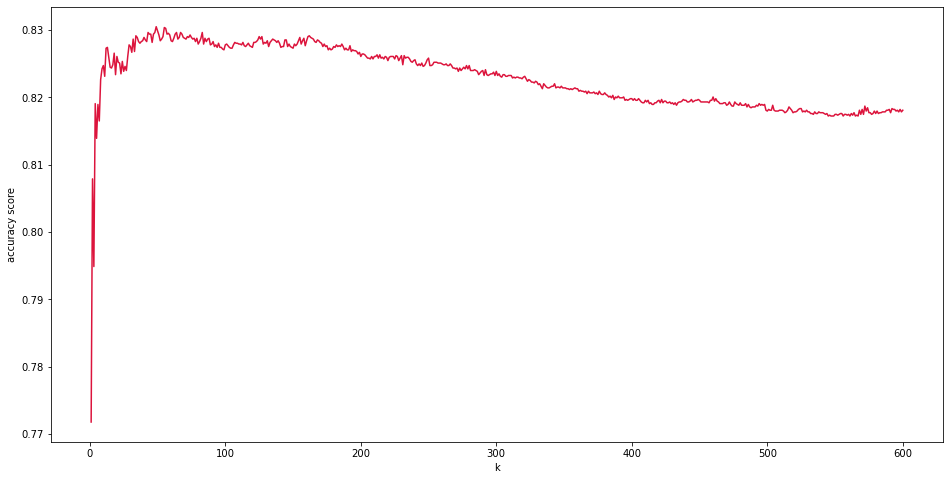

In [86]:
plt.figure(figsize=(16,8))
plt.plot(range(1,601),scores_all, color = 'crimson')
plt.ylabel('accuracy score')
plt.xlabel('k')
#plt.title('Accuracy Score of KNN model')

In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors = scores_all.index(max(scores_all))+1)
knn_classifier.fit(scaled_data_train, target_train)
knn_predictions = knn_classifier.predict(scaled_data_valid)

print(accuracy_score(target_valid,knn_predictions))
print(recall_score(target_valid,knn_predictions))
print(precision_score(target_valid,knn_predictions))
print(confusion_matrix(target_valid,knn_predictions))

0.8304876550792286
0.46802030456852795
0.7352472089314195
[[5839  332]
 [1048  922]]


In [88]:
classatree = DecisionTreeClassifier(random_state = 74)
classatree.fit(scaled_data_train, target_train)
classatree_predictions = classatree.predict(scaled_data_valid)

print(accuracy_score(target_valid,classatree_predictions))
print(recall_score(target_valid,classatree_predictions))
print(precision_score(target_valid,classatree_predictions))
print(confusion_matrix(target_valid,classatree_predictions))

0.8186954919543054
0.4984771573604061
0.6680272108843538
[[5683  488]
 [ 988  982]]


In [89]:
forest = RandomForestClassifier(n_estimators = 5000, random_state = 74)
forest.fit(scaled_data_train, target_train)
forest_predictions = forest.predict(scaled_data_valid)

print(accuracy_score(target_valid,forest_predictions))
print(recall_score(target_valid,forest_predictions))
print(precision_score(target_valid,forest_predictions))
print(confusion_matrix(target_valid,forest_predictions))

0.8277852843631004
0.516751269035533
0.6934604904632152
[[5721  450]
 [ 952 1018]]
